In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
from lab_utils_common import compute_cost
plt.style.use('./deeplearning.mplstyle')

## Problem Statement

You would like a model which can predict housing prices given the size of the house.  
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [3]:
x_train = np.array([1.0, 2.0]) # size (100sqft)
y_train = np.array([300.0, 500.0]) # cost (in per $1000)

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [4]:
#  """
#     -- Computing the cost for linear regression

#     Args:
#         - x (ndarrray (m, )) Data, m training sample for X
#         - y (ndarray (m, )): target values) m training sample for Y
#         - w, b (scalar) : model parameters for weights

#         Returns
#         total_cost (float) : The cost of using w, b as the parameters for linear regression
#                             to fir the data points between x and y and minimize difference
#                             between Y-HAT and Y
#     """


In [31]:
import math
def compute_cost(X, Y, w, b):
    
    # m , number of training samples
    m = X.shape[0]
    print(m)
    cost_sum = 0
    for i in range(m):
        f_wb = w * X[i] + b
        cost = math.pow(f_wb - Y[i], 2)
        cost_sum += cost
    total_cost = (1 / (2 / m)) * cost_sum # cost_sum / (2 * m) # same as doing (1 / (2 * m)) * cost_sum
    return total_cost

In [32]:
print(compute_cost(x_train, y_train, 1, 2))

2
1208308.0


The goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized. In this simple two point example, you can achieve this!

In the previous lab, you determined that $b=100$ provided an optimal solution so let's set $b$ to 100 and focus on $w$.

## Cost Function Visualization- 3D

Lets visualize this in 3D bu using a larger data set

can we find $w$ and $b$ that will give us a cost of 0?

In [5]:
import numpy as np
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430, 630, 730])

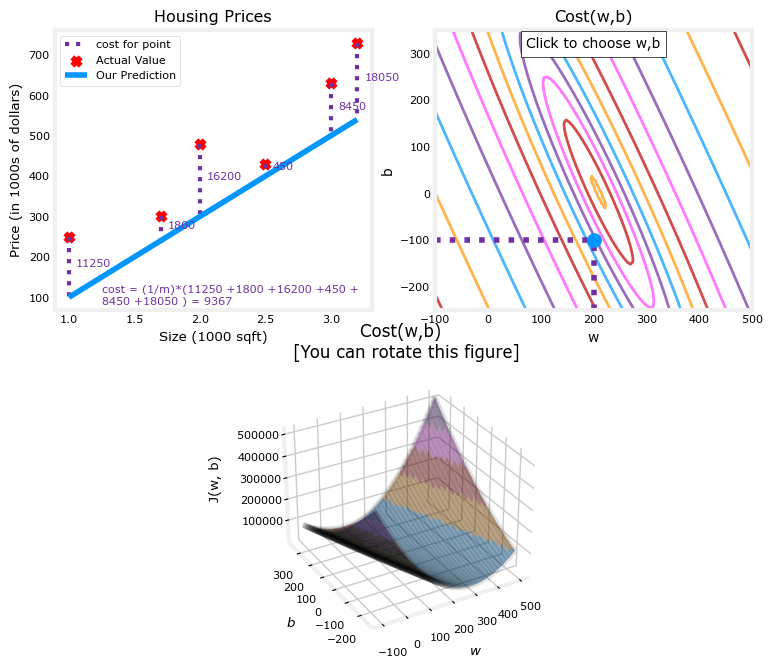

In [6]:
plt.close("all")
fig, ax, items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, items)

### Convex Cost surface

The cost function squares the loss to esnure that teh "ERROR SURFACE" is *convex* like a soup bowl.

This means it will always have a minimum which can be reached following a gradient in all directions
    through $w$ and $b$.

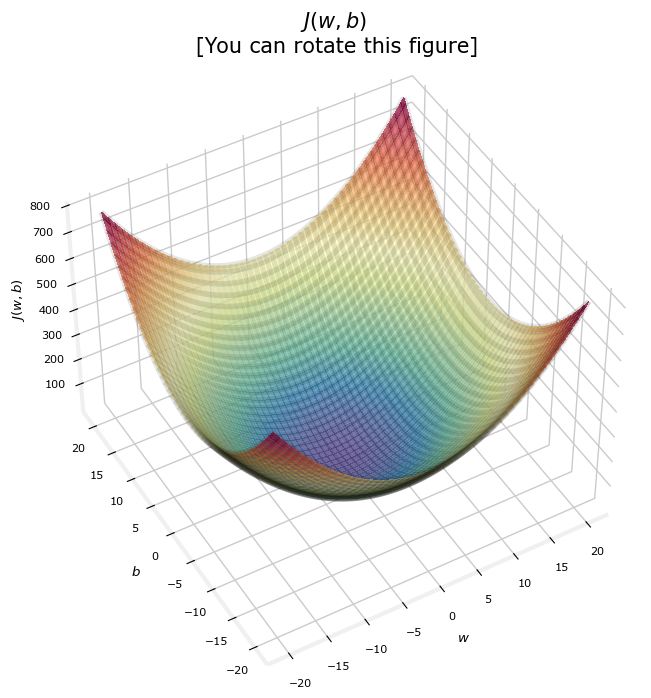

In [7]:
soup_bowl()